# Problem Set 4: Neural Networks

## Task 1

Summarizing the important functions or topics before demonstrating:

#### Neural Network

In most simple words, neural network is a series of algorithm that tries to recognize relationship in a given set of data through a way that can be closely compared to the way human brain does. Technically speaking, it is a set of layers, including the input layer, the hidden layers and the output layer, which are modified by weights.

#### Log Likelihood Function

The likelihood function describes the joint probability of the observed data as a function of some parameters. The Log Likelihood function is a logarithm of this likelihood function. We can increase/maximize the log likelihood by increasing the likelihood, as logarithms are strictly increasing functions.<br>

#### Negative Log Likelihood Function

Unlike the log likelihood function, the negative log likelihood function is a strictly decreasing function. It is used as a loss-function in a multi-class classification problem. It is calculated after the softmax function has been applied to the prediction corresponding to the correct label.<br>
##### $L(y) = -log(y)$

#### Softmax Function

A softmax function is used in the input layer of a neural network for a multi-class classification problem. It can be compared to the argmax function, but a softer version of argmax. It returns the exponent of the value divided by the sum of exponents of all values. <br>
$ Softmax(z) = s_z = \frac{e^{z_i}}{\sum_{i=1}^{n}e^{z_i}} $

Therefore, a softmax function reduces any vector given to it into a range of 0 to 1. <br>
Now, let's demonstrate how to maximize log likelihood of label with softmax and minimize the negative log likelihood of a given set of data.

Suppose z has the score of a class. For every class, we use the softmax function in the following way:
<br>
$ Softmax(z) = \frac{e^{z_i}}{\sum_{i=1}^{n}e^{z_i}} $

After that, we can apply the negative log likelihood in the following way:
<br>
$ NLL_i = -log(s_{y_i}) $

Then we proceed with backpropogation:
<br>
$ \frac{\partial NLL_i}{\partial z_i} = \frac{\partial NLL_i}{\partial s_z} \frac{\partial s_z}{\partial z_i}$<br> <br> First part: <br>$\Longrightarrow \frac{\partial NLL_i}{\partial s_z} = -\frac{1}{s_z} $ <br> Second part: <br>
$ \Longrightarrow \frac{\partial s_z}{\partial z_i} = \frac{\partial }{\partial z_i}(\frac{e^{z_i}}{\sum_{i=1}^{n}e^{z_i}})$
$ \Longrightarrow \frac{\partial s_z}{\partial z_i} = s_z*(1-s_z) $
<br>
multiplying both<br>$\frac{\partial NLL_i}{\partial z_i} = -(1-s_z) = s_z-1$

Hence, we can see that maximization of log likelihood depends on softmax function output

## Task 2 [a]

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tensorflow.keras.utils import to_categorical
tf.random.set_seed(49)
import warnings
warnings.filterwarnings('ignore')

In [2]:
class NeuralNetwork:
    def __init__(self, layers, neurons, classes, learning_rate, regularization, reg_val=0):
        self.model = Sequential()
        self.model.add(Flatten())
        if regularization:
            for _ in range(layers):
                self.model.add(Dense(neurons, activation='sigmoid', kernel_regularizer=regularizers.l2(reg_val)))
        else:
            for _ in range(layers):
                self.model.add(Dense(neurons, activation='sigmoid'))
        self.model.add(Dense(classes, activation='softmax'))
        opt = Adam(learning_rate=learning_rate)
        self.model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    def fit(self, train_x, train_y, val, epochs, batch_size, verbose):
        return self.model.fit(train_x, train_y, validation_data=val, epochs=epochs, batch_size=batch_size, verbose=verbose)
    def predict(self, test_x, test_y):
        _, accuracy = self.model.evaluate(test_x, test_y)
        return accuracy

In [3]:
def plotter(data):
    df = pd.DataFrame()
    df['train_loss'] = data.history['loss']
    df['validation_loss'] = data.history['val_loss']
    df.plot(grid=True)

In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.astype('float32')
x_train = x_train/255.0
x_test = x_test.astype('float32')
x_test = x_test/255.0
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]
data_set = {}
for i in range(10):
    data_set[i] = []
for i in range(len(x_train)):
    data_set[y_train[i]].append(x_train[i])
actual_x_train, actual_y_train = [], []
for i in range(10):
    for j in range(100):
        actual_x_train.append(data_set[i][j])
        actual_y_train.append(i)
x_tr = np.asarray(actual_x_train)
y_tr = np.asarray(actual_y_train)
y_tr = to_categorical(y_tr)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [5]:
model1 = NeuralNetwork(1, 30, 10, 0.1, False, 0)
trained_model = model1.fit(x_tr, y_tr, (x_val, y_val), 30, 10, 0)
accuracy = model1.predict(x_test, y_test)
print("1 Hidden layer, No regularization: Accuracy: " + str(accuracy*100))

313/313 [==============================] - 0s 1ms/step - loss: 1.1385 - accuracy: 0.7267
1 Hidden layer, No regularization: Accuracy: 72.67000079154968


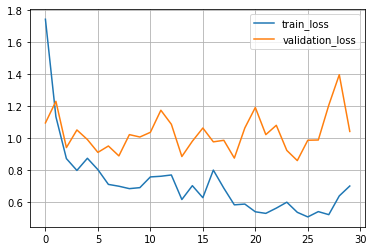

In [6]:
plotter(trained_model)

## Task 2 [b]

In [7]:
model2 = NeuralNetwork(2, 30, 10, 0.1, False, 0)
trained_model = model2.fit(x_tr, y_tr, (x_val, y_val), 30, 10, 0)
accuracy = model2.predict(x_test, y_test)
print("2 Hidden layer, No regularization: Accuracy: " + str(accuracy*100))

313/313 [==============================] - 0s 1ms/step - loss: 1.9553 - accuracy: 0.2076
2 Hidden layer, No regularization: Accuracy: 20.759999752044678


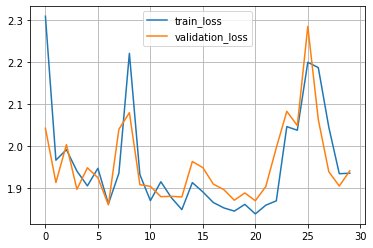

In [8]:
plotter(trained_model)

In [9]:
model3 = NeuralNetwork(3, 30, 10, 0.1, False, 0)
trained_model = model3.fit(x_tr, y_tr, (x_val, y_val), 30, 10, 0)
accuracy = model3.predict(x_test, y_test)
print("3 Hidden layer, No regularization: Accuracy: " + str(accuracy*100))

313/313 [==============================] - 0s 1ms/step - loss: 2.3145 - accuracy: 0.0958
3 Hidden layer, No regularization: Accuracy: 9.57999974489212


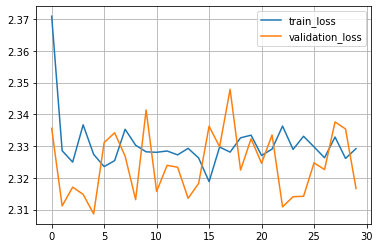

In [10]:
plotter(trained_model)

In [11]:
model4 = NeuralNetwork(1, 30, 10, 0.1, True, 0)
trained_model = model4.fit(x_tr, y_tr, (x_val, y_val), 30, 10, 0)
accuracy = model4.predict(x_test, y_test)
print("1 Hidden layer, With regularization: Accuracy: " + str(accuracy*100))

313/313 [==============================] - 0s 1ms/step - loss: 0.9505 - accuracy: 0.7461
1 Hidden layer, With regularization: Accuracy: 74.61000084877014


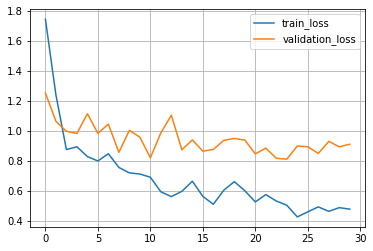

In [12]:
plotter(trained_model)

In [13]:
model5 = NeuralNetwork(2, 30, 10, 0.1, True, 0)
trained_model = model5.fit(x_tr, y_tr, (x_val, y_val), 30, 10, 0)
accuracy = model5.predict(x_test, y_test)
print("2 Hidden layer, With regularization: Accuracy: " + str(accuracy*100))

313/313 [==============================] - 0s 1ms/step - loss: 1.1933 - accuracy: 0.6066
2 Hidden layer, With regularization: Accuracy: 60.659998655319214


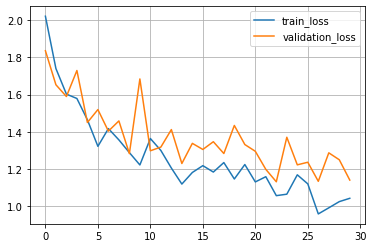

In [14]:
plotter(trained_model)

In [15]:
model6 = NeuralNetwork(3, 30, 10, 0.1, True, 0)
trained_model = model6.fit(x_tr, y_tr, (x_val, y_val), 30, 10, 0)
accuracy = model6.predict(x_test, y_test)
print("3 Hidden layer, With regularization: Accuracy: " + str(accuracy*100))

313/313 [==============================] - 0s 1ms/step - loss: 1.8917 - accuracy: 0.2503
3 Hidden layer, With regularization: Accuracy: 25.029999017715454


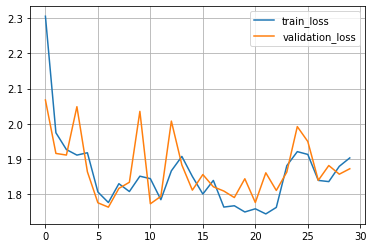

In [16]:
plotter(trained_model)

## Task 2 [c]

In [17]:
x_tr = x_tr.reshape(x_tr.shape[0], 28, 28, 1)
x_val = x_val.reshape(x_val.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [18]:
class ConvolNeuralNetwork:
    def __init__(self, is_Dropout=False):
        self.model = Sequential([
            Conv2D(32, kernel_size=(5,5), strides=(1,1), activation='relu', input_shape=(28,28,1)),
            MaxPooling2D(pool_size=(2,2), strides=(2,2)),
            Flatten()
        ])
        if is_Dropout:
            self.model.add(Dropout(0.25))
        self.model.add(Dense(10, activation='softmax'))
        opt = SGD(learning_rate=0.1)
        self.model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    def shift_rotate(self, rotate, shift):
        self.new_data = ImageDataGenerator(
            featurewise_center=True,
            featurewise_std_normalization=True,
            rotation_range=rotate,
            width_shift_range=shift,
            height_shift_range=shift,
            horizontal_flip=True
        )
    def predict(self, test_x, test_y):
        _, accuracy = self.model.evaluate(test_x, test_y)
        return accuracy
      
    def fit(self, train_x, train_y, val, batch_size, epochs):
        return self.model.fit(train_x, train_y, validation_data=val, epochs=epochs, batch_size=batch_size, verbose=0)
    def fitr(self, train_x, train_y, val, batch_size, epochs):
        self.model.fit_generator(self.new_data.flow(train_x, train_y,batch_size=batch_size), epochs=epochs, verbose=0)

In [19]:
model7 = ConvolNeuralNetwork(False)
model7.fit(x_tr, y_tr, (x_val, y_val), batch_size=128, epochs=10)
accuracy = model7.predict(x_test, y_test)
print("No Dropout CNN: Accuracy: " + str(accuracy*100))

313/313 [==============================] - 1s 3ms/step - loss: 0.4617 - accuracy: 0.8566
No Dropout CNN: Accuracy: 85.65999865531921


In [20]:
model8 = ConvolNeuralNetwork(True)
model8.fit(x_tr, y_tr, (x_val, y_val), batch_size=128, epochs=10)
accuracy = model8.predict(x_test, y_test)
print("With Dropout CNN: Accuracy: " + str(accuracy*100))

313/313 [==============================] - 1s 3ms/step - loss: 0.4620 - accuracy: 0.8573
With Dropout CNN: Accuracy: 85.72999835014343


In [21]:
model9 = ConvolNeuralNetwork(True)
model9.shift_rotate(3, 3)
model9.fitr(x_tr, y_tr, (x_val, y_val), batch_size=128, epochs=10)
accuracy = model9.predict(x_test, y_test)
print("Clockwise, Shift, Rotate, Dropout CNN: Accuracy: " + str(accuracy*100))

313/313 [==============================] - 1s 2ms/step - loss: 0.7877 - accuracy: 0.7600
Clockwise, Shift, Rotate, Dropout CNN: Accuracy: 75.99999904632568


In [22]:
model0 = ConvolNeuralNetwork(True)
model0.shift_rotate(-3, 3)
model0.fitr(x_tr, y_tr, (x_val, y_val), batch_size=128, epochs=10)
accuracy = model0.predict(x_test, y_test)
print("Counter-Clockwise, Shift, Rotate, Dropout CNN: Accuracy: " + str(accuracy*100))

313/313 [==============================] - 1s 2ms/step - loss: 0.8109 - accuracy: 0.7416
Counter-Clockwise, Shift, Rotate, Dropout CNN: Accuracy: 74.1599977016449


## References:
- https://en.wikipedia.org/
- Lecture Notes: Neural Networks
- https://keras.io/api/layers/convolution_layers/
- https://keras.io/api/models/model_training_apis/#evaluate-method
- https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator